---
title: "2023_Kronensicherung_Plesse_Analyse"
author: "Kyell Jensen"
date: "2024-08-06"
format: pdf
editor: visual
---

# 2023_Kronensicherung_Plesse_Analyse

## Analyse der Schwingungsparameter

Nutze eine geeignete Python 3.11 Umgebung (z. B. virtuelle Environment).

## Arbeitsumgebung vorbereiten


### IMPORT: Packages

In [1]:
# Struktur & Typen
from pathlib import Path
from typing import Dict, List

# Datenverarbeitung
import json
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
from slugify import slugify  # Zum Vereinheitlichen von Strings

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

# Statistik
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Eigene Module und Funktionen
from kj_core.utils.latex_export import (
    generate_latex_table,
    generate_grouped_latex_tables,
    save_latex_table,
    build_data_dict_df,
    grouped_describe
)
from kj_core.utils.labeling import (
    get_label_from_dict,
    get_color_dict
)
from kj_core import (
    CoreConfig,
    PlotManager,
    get_logger
)

# Projekteinstellungen
from project_config import (
    working_directory,
    data_export_directory,
    latex_export_directory,
    filename_clean_dataset,
    filename_clean_data_dict
)

### IMPORT: Manager Instanzen

In [3]:
logger = get_logger(__name__)
CONFIG = CoreConfig(working_directory=f"{working_directory}/combined")
PLOT_MANAGER = PlotManager(CONFIG)

2025-08-26 15:56:50 [WARNING] kj_core.core_config.set_working_directory: The directory C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined already exists.
2025-08-26 15:56:50 [INFO] kj_core.core_config.set_working_directory: Working directory set to C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined!
2025-08-26 15:56:50 [INFO] kj_core.core_config.__init__: <CoreConfig>
  Package:            kj_core
  Working Directory:  C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined
  Plot Directory:     C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\combined\plots
  Data Directory:     C:\kyellsen\005_Projekte\2024

## IMPORT: Daten Import

In [4]:
# Dateien laden
df = pd.read_feather(data_export_directory / filename_clean_dataset)

with open(data_export_directory / filename_clean_data_dict, "r", encoding="utf-8") as f:
    data_dict = json.load(f)

## ANALYSE: Explorative Datenanalyse

In [5]:
df.head(10)

,id,rope_datetime,treatment,release_force_target,rope_release,cable_max_force,cable_integral,sensor_name,location,direction,...,frequency_damped,phase_angle,y_shift,x_shift,frequency_undamped,damping_ratio,metrics_warning,pearson_r,nrmse,nmae
4,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,0.0,Elasto(90),StB,elongation,...,0.441518,0.200000,-5.287164,0.116641,0.442936,0.503994,False,0.943158,0.038866,0.018011
5,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,0.0,Elasto(92),StB,elongation,...,0.432441,-0.200000,-14.233644,-0.009730,0.436601,0.873595,False,0.929554,0.034560,0.016183
6,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,0.0,Elasto(95),StA,elongation,...,0.422702,-0.200000,-19.011309,-0.123043,0.426319,0.823807,False,0.908058,0.044873,0.024274
7,2,2022-03-23 11:24:23,free,2.8,2.72310,NaN,0.0,Elasto(98),StA,elongation,...,0.443529,-0.065967,-1.099515,0.118608,0.445993,0.663224,False,0.980663,0.029621,0.021087
8,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,0.0,Elasto(90),StB,elongation,...,0.440653,0.200000,7.775284,0.097887,0.441317,0.344951,False,0.957380,0.043035,0.018619
9,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,0.0,Elasto(92),StB,elongation,...,0.439321,-0.075771,7.052210,0.094719,0.441380,0.608931,False,0.933463,0.043534,0.021255
10,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,0.0,Elasto(95),StA,elongation,...,0.436023,-0.200000,-3.785755,-0.075741,0.438127,0.618021,False,0.938307,0.039020,0.022498
11,3,2022-03-23 11:31:12,free,2.8,2.76205,NaN,0.0,Elasto(98),StA,elongation,...,0.441350,-0.200000,-17.747289,-0.203345,0.442888,0.525070,False,0.974139,0.028693,0.020715
12,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,0.0,Elasto(90),StB,elongation,...,0.439065,0.200000,-23.445975,0.120929,0.439764,0.354677,False,0.945320,0.049764,0.021509
13,4,2022-03-23 11:54:33,free,2.8,2.73950,NaN,0.0,Elasto(92),StB,elongation,...,0.436850,-0.200000,-19.454720,0.061912,0.438829,0.598701,False,0.922665,0.050822,0.020659


In [6]:
df.columns

Index(['id', 'rope_datetime', 'treatment', 'release_force_target',
       'rope_release', 'cable_max_force', 'cable_integral', 'sensor_name',
       'location', 'direction', 'height', 'diameter', 'max_strain',
       'max_compression', 'integral_intercept', 'integral_positiv',
       'integral_negativ', 'integral_abs', 'integral_ratio', 'm_amplitude',
       'm_amplitude_2', 'initial_amplitude', 'damping_coeff',
       'frequency_damped', 'phase_angle', 'y_shift', 'x_shift',
       'frequency_undamped', 'damping_ratio', 'metrics_warning', 'pearson_r',
       'nrmse', 'nmae'],
      dtype='object')

### SET: Definition von Darstellungsstandards
Festlegen von Farbcodes für einheitliche Darstellung von Sensoren und Behandlungsvarianten für alle nachfolgenden Plots.

In [7]:
color_palette = PLOT_MANAGER.color_palette_list

# Für die Spalte "treatment":
treatment_color_dict = get_color_dict(df, "treatment", PLOT_MANAGER.color_palette_list)
# Für die Spalte "sensor_name":
sensor_color_dict = get_color_dict(df, "sensor_name", PLOT_MANAGER.color_palette_list)

Index(['free', 'gefa_dynamic', 'cobra_static'], dtype='object')
Index(['Elasto(90)', 'Elasto(92)', 'Elasto(95)', 'Elasto(98)'], dtype='object')


### LATEX-EXPORT: Latex-Export von Daten für Anhang

Exportiere Rohdaten der Schwingungsanalyse vollständig

In [8]:
variables = ['id', 'sensor_name', 'treatment', 'm_amplitude', 'm_amplitude_2', 'initial_amplitude', 'frequency_damped', 'frequency_undamped', 'damping_coeff', 'damping_ratio', 'y_shift', 'pearson_r', 'nmae']

# DataFrame kopieren und die gewünschten Spalten auswählen
df_latex = df.copy()[variables]

# Spaltennamen mit den Kurzbezeichnungen (Zeichen) aus dem data_dict umbenennen
df_latex = df_latex.rename(columns={var: data_dict[var]["Zeichen"] for var in variables})
# Funktionsaufruf mit Beispielparametern
generate_grouped_latex_tables(
    df_latex=df_latex,
    caption="Plesse - Ergebnisse, Schwingungsparameter vollständig",
    column_format="lrl|rrr|rr|rr|r|rr",
    group_by="treatment",
    latex_export_directory=latex_export_directory
)

Content saved to: C:\kyellsen\005_Projekte\2024_BA\032_Feldversuch_2023_Plesse\030_Analysen\2023_Kronensicherung_Plesse_Kraefte_Schwingungen\working_directory\export_latex\plesse_ergebnisse_schwingungsparameter_vollstandig.tex


## SET: Definiere zu untersuchende Schwingungsparameter

In diesem Abschnitt werden die Schwingungsparameter statistisch ausgewertet. Ziel ist es, den Einfluss verschiedener Behandlungsvarianten (treatment) auf die gemessenen Schwingungsparameter zu untersuchen und dabei auch den potenziellen Einfluss der Vorspannung (rope_release) und Sensorposition (sensor_name) zu berücksichtigen.


In [9]:
variables = [
    'max_strain',
    'max_compression',
    'm_amplitude', 
    'm_amplitude_2',
    'initial_amplitude',
    'frequency_damped', 
    'frequency_undamped',
    'damping_coeff', 
    'damping_ratio', 
    #'phase_angle', 
    'y_shift', 
    #'x_shift',
    'pearson_r',
    #'nrmse', 
    'nmae',
]

add_variables = ["id", "treatment", "rope_release", "cable_max_force"]

## ANALYSE: Systematischer Einfluss der Sensorposition

Ziel: Visuell erkennen, ob unterschiedliche Sensoren konsistent andere Werte liefern.

In [10]:
# Plot erstellen
for i, var in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))
    sns.boxplot(x="sensor_name", y=var, data=df, dodge=True)
    # Titel und Achsentitel setzen
    plt.title(f"Einfluss der Sensoren auf {get_label_from_dict(var, data_dict, use_titel=True)}")
    plt.xlabel("Sensorname")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"sensor_effect_{i}_{var}", subdir="ptq_osc_sensor_effect_no_groups")

Ziel: Feststellen, ob die Variation durch unterschiedliche Sensorpostion relativ zur behandlungsbedingten Variation relevant ist.

In [11]:
# Plot erstellen
for i, var in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))
    sns.boxplot(x="sensor_name", y=var, data=df, hue="treatment", palette=treatment_color_dict,  dodge=True)
    # Stripplot: Punkte zur Veranschaulichung der Verteilung
    sns.stripplot(x="sensor_name", y=var, data=df, hue="treatment", palette=treatment_color_dict, dodge=True, alpha=1, jitter=True, size=5, legend=False)
    # Titel und Achsentitel setzen
    plt.title(f"Einfluss der Behandlung auf {get_label_from_dict(var, data_dict, use_titel=True)} gruppiert über Sensoren")
    plt.xlabel("Sensorname")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"sensor_effect_by_treatment_{i}_{var}", subdir="ptq_osc_sensor_effect_by_treatment")

Ziel: Feststellen, ob die Variation durch unterschiedliche Behandlungen relativ zur sensorbedingten Variation relevant ist.

In [12]:
# Plot erstellen
for i, var in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))
    sns.boxplot(x="treatment", y=var, data=df, palette=sensor_color_dict, hue='sensor_name')
    sns.stripplot(x="treatment", y=var, data=df, palette=sensor_color_dict, hue='sensor_name', dodge=True, alpha=1, jitter=True, size=5, legend=False)
    plt.title(f"Einfluss der Sensoren auf {get_label_from_dict(var, data_dict, use_titel=True)} gruppiert über Behandlung")
    plt.xlabel("Behandlungsvariante")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_by_sensor_{i}_{var}", subdir="ptq_osc_treatment_effect_by_sensor")

### ANALYSE: Effekt der Sensorposition innerhalb einer Beobachtung

In [13]:
# 1. Deskriptive Statistiken pro Sensor
summary_by_sensor = df.groupby('sensor_name', observed=False)[variables].describe()
summary_by_sensor

max_strain                                                       \
                 count        mean        std    min     25%    50%     75%   
sensor_name                                                                   
Elasto(90)        27.0  360.955556  35.985417  310.2  331.45  354.7  384.15   
Elasto(92)        27.0  232.140741  29.171644  184.6  212.15  228.3  245.20   
Elasto(95)        27.0  218.670370  28.335922  155.3  199.75  216.9  237.00   
Elasto(98)        27.0  181.800000  26.336214  128.9  163.50  184.8  198.80   

                   max_compression              ... pearson_r            nmae  \
               max           count        mean  ...       75%       max count   
sensor_name                                     ...                             
Elasto(90)   429.6            27.0 -149.022222  ...  0.954331  0.972302  27.0   
Elasto(92)   291.5            27.0  -50.892593  ...  0.929332  0.935316  27.0   
Elasto(95)   266.3            27.0  -50.437037  ...  0.922548  0.941718  27.0   
Elasto(98)   234.6            27.0 -123.570370  ...  0.975588  0.987644  27.0   

                                                                         \
                 mean       std       min       25%       50%       75%   
sensor_name                                                               
Elasto(90)   0.021500  0.005037  0.014277  0.017918  0.021389  0.024024   
Elasto(92)   0.029160  0.006568  0.016183  0.025229  0.028271  0.033684   
Elasto(95)   0.033910  0.007446  0.022498  0.029312  0.032552  0.037804   
Elasto(98)   0.030302  0.009289  0.019387  0.021929  0.028730  0.036272   

                       
                  max  
sensor_name            
Elasto(90)   0.033497  
Elasto(92)   0.041554  
Elasto(95)   0.050641  
Elasto(98)   0.054711  

[4 rows x 96 columns]

In [14]:
# 3. ANOVA: Teste, ob die Unterschiede zwischen den Sensoren signifikant sind
print("\nANOVA-Tests für Unterschiede zwischen den Sensoren:")
for var in variables:
    # Fit eines linearen Modells mit sensor_name als Prädiktor
    model = smf.ols(formula=f"{var} ~ C(sensor_name)", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA für {var}:")
    print(anova_table)


ANOVA-Tests für Unterschiede zwischen den Sensoren:

ANOVA für max_strain:
                       sum_sq     df           F        PR(>F)
C(sensor_name)  492818.234352    3.0  180.397796  4.550338e-41
Residual         94703.848148  104.0         NaN           NaN

ANOVA für max_compression:
                       sum_sq     df          F        PR(>F)
C(sensor_name)  206732.324722    3.0  50.247393  3.723270e-20
Residual        142628.704444  104.0        NaN           NaN

ANOVA für m_amplitude:
                       sum_sq     df           F        PR(>F)
C(sensor_name)  285512.786759    3.0  150.310192  1.134409e-37
Residual         65849.005370  104.0         NaN           NaN

ANOVA für m_amplitude_2:
                       sum_sq     df          F        PR(>F)
C(sensor_name)  145674.651736    3.0  79.526795  8.219855e-27
Residual         63501.296852  104.0        NaN           NaN

ANOVA für initial_amplitude:
                      sum_sq     df         F    PR(>F)
C(sensor_n

#### ANAYLSE: Optimaler Ansatz: Versuche Mixed-Linear Model

Die Daten sind hierarchisch: mehrere Messungen (vier Sensoren) pro Beobachtungseinheit (`id`). Ein Mixed-Effects Modell könnte diese Struktur abbilden, indem zufällige Effekte für `id` und feste Effekte für `treatment` sowie `sensor_name` berücksichtigt werden. Zusätzlich kann `rope_release` als Kovariate eingeführt werden. Dieser Ansatz wären theoretisch optimal, aber aufgrund der geringen Stichprobengröße und der komplexen Datenstruktur treten Konvergenzprobleme auf.

In [15]:
# Ergebnisse als Dictionary speichern
results_dict = {}

for var in variables:
    model = smf.mixedlm(
        f"{var} ~ C(treatment) + C(sensor_name) + rope_release", 
        data=df, 
        groups=df["id"]
    )
    result = model.fit()
    print(f"\n### Ergebnisse für {var}:")
    print(result.summary())
    print("\n")


### Ergebnisse für max_strain:
                    Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        max_strain
No. Observations:         108            Method:                    REML      
No. Groups:               27             Scale:                     353.4447  
Min. group size:          4              Log-Likelihood:            -461.3200 
Max. group size:          4              Converged:                 Yes       
Mean group size:          4.0                                                 
------------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                     220.174   22.573   9.754 0.000  175.932  264.417
C(treatment)[T.gefa_dynamic]    5.177    7.113   0.728 0.467   -8.765   19.119
C(treatment)[T.cobra_static]  -13.986    

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



### Ergebnisse für m_amplitude:
                    Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        m_amplitude
No. Observations:        108            Method:                    REML       
No. Groups:              27             Scale:                     132.9901   
Min. group size:         4              Log-Likelihood:            -401.0882  
Max. group size:         4              Converged:                 Yes        
Mean group size:         4.0                                                  
------------------------------------------------------------------------------
                              Coef.   Std.Err.    z    P>|z|  [0.025   0.975] 
------------------------------------------------------------------------------
Intercept                     176.807    8.761  20.181 0.000  159.636  193.979
C(treatment)[T.gefa_dynamic]  -22.747    2.720  -8.363 0.000  -28.078  -17.416
C(treatment)[T.cobra_static]  -44.541   

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t


### Ergebnisse für m_amplitude_2:
                   Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      m_amplitude_2
No. Observations:       108          Method:                  REML         
No. Groups:             27           Scale:                   180.6924     
Min. group size:        4            Log-Likelihood:          -416.5641    
Max. group size:        4            Converged:               No           
Mean group size:        4.0                                                
---------------------------------------------------------------------------
                              Coef.  Std.Err.    z    P>|z|  [0.025  0.975]
---------------------------------------------------------------------------
Intercept                    126.698   10.211  12.408 0.000 106.685 146.711
C(treatment)[T.gefa_dynamic] -22.014    3.170  -6.944 0.000 -28.227 -15.801
C(treatment)[T.cobra_static] -49.446    3.170 -15.600 0.000 -55.659 -43.

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(



### Ergebnisse für initial_amplitude:
                  Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    initial_amplitude
No. Observations:      108        Method:                REML             
No. Groups:            27         Scale:                 107.3820         
Min. group size:       4          Log-Likelihood:        -392.0669        
Max. group size:       4          Converged:             Yes              
Mean group size:       4.0                                                
--------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------------
Intercept                    172.524    8.477 20.353 0.000 155.910 189.138
C(treatment)[T.gefa_dynamic]  -0.008    2.641 -0.003 0.998  -5.184   5.168
C(treatment)[T.cobra_static]  -5.094    2.640 -1.929 0.054 -10.269   0.082
C(sen

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



### Ergebnisse für frequency_damped:
                 Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    frequency_damped
No. Observations:    108        Method:                REML            
No. Groups:          27         Scale:                 0.0009          
Min. group size:     4          Log-Likelihood:        197.8822        
Max. group size:     4          Converged:             Yes             
Mean group size:     4.0                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.441    0.023 18.947 0.000  0.395  0.487
C(treatment)[T.gefa_dynamic]  0.014    0.007  1.968 0.049  0.000  0.028
C(treatment)[T.cobra_static]  0.046    0.007  6.357 0.000  0.032  0.060
C(sensor_name)[T.Elasto(92)] -0.046    0.00

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)



### Ergebnisse für frequency_undamped:
                 Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   frequency_undamped
No. Observations:    108       Method:               REML              
No. Groups:          27        Scale:                0.0007            
Min. group size:     4         Log-Likelihood:       215.2019          
Max. group size:     4         Converged:            Yes               
Mean group size:     4.0                                               
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.438    0.020 22.335 0.000  0.400  0.476
C(treatment)[T.gefa_dynamic]  0.016    0.006  2.641 0.008  0.004  0.028
C(treatment)[T.cobra_static]  0.060    0.006  9.927 0.000  0.048  0.072
C(sensor_name)[T.Elasto(92)] -0.034    0.

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t


### Ergebnisse für damping_coeff:
                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     damping_coeff
No. Observations:     108         Method:                 REML         
No. Groups:           27          Scale:                  0.0137       
Min. group size:      4           Log-Likelihood:         62.4633      
Max. group size:      4           Converged:              No           
Mean group size:      4.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.093    0.089  1.046 0.296 -0.081  0.267
C(treatment)[T.gefa_dynamic]  0.102    0.028  3.679 0.000  0.047  0.156
C(treatment)[T.cobra_static]  0.456    0.028 16.503 0.000  0.402  0.510
C(sensor_name)[T.Elasto(92)]  0.327    0.032 1

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)



### Ergebnisse für damping_ratio:
                 Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     damping_ratio
No. Observations:     108         Method:                 REML         
No. Groups:           27          Scale:                  0.1131       
Min. group size:      4           Log-Likelihood:         -44.0830     
Max. group size:      4           Converged:              Yes          
Mean group size:      4.0                                              
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     0.181    0.256  0.709 0.479 -0.320  0.682
C(treatment)[T.gefa_dynamic]  0.208    0.079  2.617 0.009  0.052  0.363
C(treatment)[T.cobra_static]  0.988    0.079 12.460 0.000  0.833  1.144
C(sensor_name)[T.Elasto(92)]  0.871    0.092  

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(



### Ergebnisse für pearson_r:
                 Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      pearson_r
No. Observations:       108          Method:                  REML     
No. Groups:             27           Scale:                   0.0028   
Min. group size:        4            Log-Likelihood:          141.9717 
Max. group size:        4            Converged:               No       
Mean group size:        4.0                                            
-----------------------------------------------------------------------
                             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------
Intercept                     1.010    0.040 24.950 0.000  0.931  1.090
C(treatment)[T.gefa_dynamic] -0.067    0.013 -5.296 0.000 -0.091 -0.042
C(treatment)[T.cobra_static] -0.112    0.013 -8.901 0.000 -0.137 -0.087
C(sensor_name)[T.Elasto(92)] -0.080    0.015 -5.52

C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.536368
  warnings.warn(msg, ConvergenceWarning)
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
C:\kyellsen\006_Packages\venv_Python311\Lib\site-packages\statsmodels\regressio

Um dennoch aussagekräftige Ergebnisse zu erhalten, wird ein zweistufiges Verfahren genutzt.
Zwei Varianten:
- Mittlung über alle Sensoren innerhalb eine Beobachtung. Die Variation zwischen den Sensoren bleibt unberücksichtigt und verfälscht ggf. die Ergebnisse. Vorteil: Sehr einfach und stabil
- Werte um Sensor-Effekt manuell adjustieren und dann aggregieren wie zuvor. Vorteile: Sensoren verfälschen nicht die Ergebnisse. Nachteil ist die höhere Komplexität und das die Gesamtvariation der Modell am ende verfälsch ist.

#### ANALYSE Alternative 1: Vereinfachtes Vorgehen durch Aggregation (Mittelwert)

Eine andere mögliche Vorgehensweise wäre gewesen, die systematischen Sensor‑Effekte mithilfe eines Regressionsmodells (z. B. OLS mit Summenkontrasten) zu schätzen und die Rohwerte über die Modell‑Residuen zu korrigieren. Da in unserem vollständig balancierten Design jedoch jeder der vier Sensoren pro ID genau einmal vorliegt und der Sensor‑Einfluss rein additiv ist, hebeln sich additive Sensor‑Offsets beim einfachen Mittel komplett aus. Eine vorerst verwendete Regressionskorrektur bringt hier keinen Informationsgewinn und kann entfallen.

In [16]:
# 1. Gruppieren, mitteln, Suffix hinzufügen, joinen und Spalten umsortieren in einer Pipeline
df_adj = (
    df
    .groupby("id")[variables]        # nur die Original-Spalten auswählen
    .mean()                             # über id mitteln
    #.add_suffix("_mean")              # Suffix anfügen
    .reset_index()
    .merge(
        df[add_variables].drop_duplicates(),  # Zusatzspalten (z. B. treatment, rope_release, cable_max_force)
        on="id"
    )
)

assert df_adj['treatment'].notna().all(), "Merge-Fehler: missing treatments!"

cols = add_variables + [c for c in df_adj.columns if c not in add_variables]
df_adj = df_adj.loc[:, cols]

# 2. Ergebnis kontrollieren
df_adj.describe()

,id,rope_release,cable_max_force,max_strain,max_compression,m_amplitude,m_amplitude_2,initial_amplitude,frequency_damped,frequency_undamped,damping_coeff,damping_ratio,y_shift,pearson_r,nmae
count,27.000000,27.000000,18.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,15.000000,2.371609,1.937778,248.391667,-93.480556,163.073148,84.181019,169.782102,0.456529,0.463876,0.434008,0.968317,-5.079368,0.890742,0.028718
std,7.937254,0.320477,0.799541,25.407331,31.077756,22.737134,21.178032,5.469971,0.022027,0.027672,0.200735,0.442297,11.344863,0.050287,0.006107
min,2.000000,1.946800,1.010000,204.125000,-144.950000,124.700000,50.825000,164.414861,0.435009,0.436606,0.218833,0.499237,-29.681988,0.813610,0.019889
25%,8.500000,2.012975,1.160000,232.437500,-125.262500,148.368750,61.868750,166.161477,0.437784,0.439283,0.276357,0.636314,-11.476625,0.846028,0.024730
50%,15.000000,2.356550,1.890000,244.750000,-80.800000,162.850000,87.362500,169.854061,0.450018,0.453386,0.336295,0.748273,-2.640311,0.894191,0.027968
75%,21.500000,2.748225,2.717500,262.400000,-73.425000,181.712500,102.618750,170.241598,0.466431,0.483996,0.692071,1.469274,1.091476,0.946130,0.032275
max,28.000000,2.780700,3.090000,297.150000,-43.775000,204.950000,115.737500,189.345841,0.508053,0.522475,0.748626,1.757161,15.637199,0.956986,0.043212


In [17]:
df_adj.to_csv(data_export_directory / "_dataset_df_adj.csv", sep=";", index=True, encoding="utf-8")

## ANALYSE: Systematischer Einfluss der Behandlungsvariante auf Schwingungsparameter

In [18]:
# Ausgewählte Zielvariablen
variables = [
    'max_strain','max_compression','m_amplitude','m_amplitude_2',
    'initial_amplitude','frequency_damped','frequency_undamped',
    'damping_coeff','damping_ratio','y_shift','pearson_r','nmae'
]

### ANALYSE: Deskriptive Statistik

Es sind Unterschiede erkennbar je nach Gruppe, weitere Auswertung folgt

In [19]:
df_adj_desc = df_adj.groupby("treatment", observed=True).describe()
print(df_adj_desc)

                id                                               rope_release  \
             count  mean       std   min   25%   50%   75%   max        count   
treatment                                                                       
free           9.0   6.0  2.738613   2.0   4.0   6.0   8.0  10.0          9.0   
gefa_dynamic   9.0  15.0  2.738613  11.0  13.0  15.0  17.0  19.0          9.0   
cobra_static   9.0  24.0  2.738613  20.0  22.0  24.0  26.0  28.0          9.0   

                        ... pearson_r            nmae                      \
                  mean  ...       75%       max count      mean       std   
treatment               ...                                                 
free          2.358678  ...  0.955038  0.956986   9.0  0.022945  0.002540   
gefa_dynamic  2.379867  ...  0.899477  0.906938   9.0  0.032668  0.006300   
cobra_static  2.376283  ...  0.845354  0.884288   9.0  0.030540  0.004037   

                                                  

### VISUALISIERUNG: Explorative Visualisierung

In [20]:
# Plot erstellen
for i, var in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_adj, x="treatment", y=var, hue="treatment", palette=treatment_color_dict)
    
    # Titel und Achsentitel setzen
    plt.title(f"Einfluss der Behandlung auf {get_label_from_dict(var, data_dict, use_titel=True)}")
    plt.xlabel("Behandlungsvariante")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_{i}_{var}", subdir="ptq_osc_treatment_effect_df_adj")

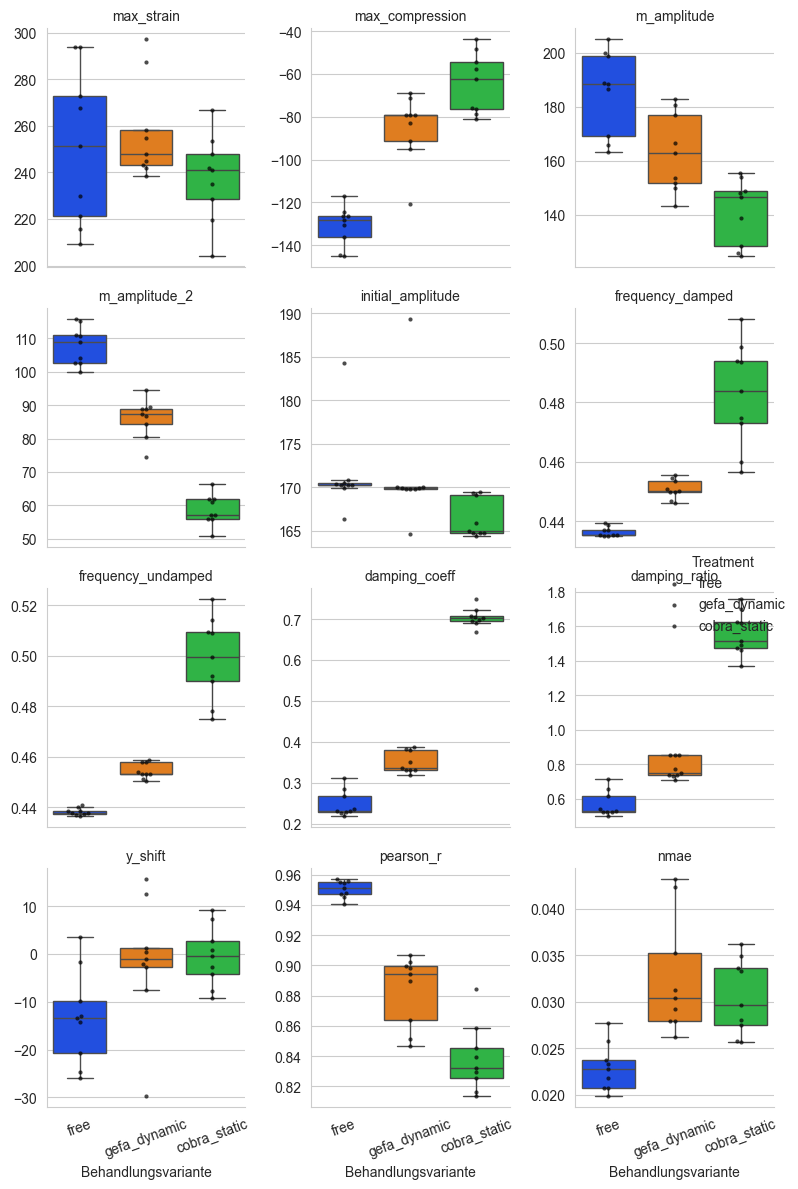

In [21]:
# Long-Format erzeugen
df_long = df_adj.melt(
    id_vars=add_variables, 
    value_vars=variables,
    var_name="Parameter", 
    value_name="Messwert"
)

# FacetGrid mit Box- & Swarmplots
g = sns.FacetGrid(df_long, col="Parameter", col_wrap=3, sharey=False, hue="treatment",
                  palette=treatment_color_dict, height=3.5, aspect=1)
g.map_dataframe(sns.boxplot,   x="treatment", y="Messwert", showfliers=False, dodge=True)
g.map_dataframe(sns.swarmplot, x="treatment", y="Messwert", dodge=True, size=3, alpha=0.7, color="black")
g.set_axis_labels("Behandlungsvariante", "").set_titles("{col_name}").add_legend(title="Treatment")
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(20)
g.fig.set_size_inches(8, 12)
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(g.fig, filename="treatment_effect_facet_grid", subdir="ptq_osc_treatment_effect_df_adj")

### ANALYSE: Statistische Auswertung ANCOVA

In [22]:
treatment_order = list(df_adj["treatment"].cat.categories)

In [23]:
# Container für alle Ergebnisse
resid_list = []
anova_list = []
tukey_list = []

for var in variables:
    # 1) ANCOVA-Modell fitten
    model = smf.ols(f"{var} ~ C(treatment) + rope_release", data=df_adj).fit()
    
    # 2) Residuen-Tests
    W,    p_sh = st.shapiro(model.resid)
    stat_le, p_le = st.levene(
        *[model.resid[df_adj['treatment']==g] for g in df_adj['treatment'].cat.categories]
    )
    resid_list.append({
        'variable':    var,
        'W_shapiro':   W,
        'p_shapiro':   p_sh,
        'stat_levene': stat_le,
        'p_levene':    p_le
    })
    
    # 3) ANOVA-Tabelle (Typ II)
    aov = sm.stats.anova_lm(model, typ=2)
    
    # Extrahiere Treatment-Effekt
    ss_tr   = aov.loc['C(treatment)', 'sum_sq']
    df_tr   = int(aov.loc['C(treatment)', 'df'])
    ms_tr   = ss_tr / df_tr
    F_tr    = aov.loc['C(treatment)', 'F']
    p_tr    = aov.loc['C(treatment)', 'PR(>F)']
    
    # Extrahiere rope_release-Effekt
    ss_rr   = aov.loc['rope_release', 'sum_sq']
    df_rr   = int(aov.loc['rope_release', 'df'])
    ms_rr   = ss_rr / df_rr
    F_rr    = aov.loc['rope_release', 'F']
    p_rr    = aov.loc['rope_release', 'PR(>F)']
    
    # Residual-Informationen
    ss_res  = aov.loc['Residual', 'sum_sq']
    df_res  = int(aov.loc['Residual', 'df'])
    ms_res  = ss_res / df_res
    
    # partielle η² für Treatment und rope_release
    eta2p_tr = ss_tr / (ss_tr + ss_res)
    eta2p_rr = ss_rr / (ss_rr + ss_res)
    
    anova_list.append({
        'variable':         var,
        # Treatment
        'df_treatment':     df_tr,
        'SS_treatment':     ss_tr,
        'MS_treatment':     ms_tr,
        'F_treatment':      F_tr,
        'p_treatment':      p_tr,
        'eta2p_treatment':  eta2p_tr,
        # rope_release
        'df_rope':          df_rr,
        'SS_rope':          ss_rr,
        'MS_rope':          ms_rr,
        'F_rope':           F_rr,
        'p_rope':           p_rr,
        'eta2p_rope':       eta2p_rr,
        # Residual
        'df_residual':      df_res,
        'SS_residual':      ss_res,
        'MS_residual':      ms_res
    })
    
    # Tukey HSD
    tukey = pairwise_tukeyhsd(endog=df_adj[var], groups=df_adj['treatment'], alpha=0.05)
    tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
    tukey_df.insert(0, 'variable', var)
    tukey_list.append(tukey_df)

# Erzeuge die DataFrames
df_resid = pd.DataFrame(resid_list).set_index('variable')
df_anova = pd.DataFrame(anova_list).set_index('variable')
df_tukey = pd.concat(tukey_list, ignore_index=True)

In [24]:
df_resid

,W_shapiro,p_shapiro,stat_levene,p_levene
variable,,,,
max_strain,0.958734,0.345713,0.362994,0.699344
max_compression,0.980521,0.873932,0.110419,0.895911
m_amplitude,0.967817,0.545284,0.265410,0.769113
m_amplitude_2,0.872693,0.003353,0.081191,0.922270
initial_amplitude,0.683122,0.000002,0.143846,0.866762
frequency_damped,0.845790,0.000952,21.744567,0.000004
frequency_undamped,0.840948,0.000766,22.373361,0.000003
damping_coeff,0.907675,0.020129,0.285480,0.754171
damping_ratio,0.928670,0.064116,1.859126,0.177560


In [25]:
print(df_anova)

                    df_treatment  SS_treatment  MS_treatment  F_treatment  \
variable                                                                    
max_strain                     2   1768.951714    884.475857     3.887180   
max_compression                2  21055.844168  10527.922084    67.536963   
m_amplitude                    2   8924.111554   4462.055777   304.208870   
m_amplitude_2                  2  11041.167623   5520.583812   364.347324   
initial_amplitude              2    155.396784     77.698392     2.907589   
frequency_damped               2      0.009956      0.004978    45.430931   
frequency_undamped             2      0.017626      0.008813    94.844207   
damping_coeff                  2      1.030115      0.515058   677.854377   
damping_ratio                  2      4.885907      2.442953   280.719730   
y_shift                        2    926.726220    463.363110     4.415121   
pearson_r                      2      0.056992      0.028496    80.124681   

In [26]:
df_tukey

,variable,group1,group2,meandiff,p-adj,lower,upper,reject
0,max_strain,cobra_static,free,12.9194,0.5262,-16.5418,42.3807,False
1,max_strain,cobra_static,gefa_dynamic,19.3806,0.2477,-10.0807,48.8418,False
2,max_strain,free,gefa_dynamic,6.4611,0.8486,-23.0001,35.9224,False
3,max_compression,cobra_static,free,-66.6333,0.0000,-82.2710,-50.9956,True
4,max_compression,cobra_static,gefa_dynamic,-21.0917,0.0069,-36.7294,-5.4540,True
5,max_compression,free,gefa_dynamic,45.5417,0.0000,29.9040,61.1794,True
6,m_amplitude,cobra_static,free,43.8208,0.0000,27.1719,60.4698,True
7,m_amplitude,cobra_static,gefa_dynamic,21.9403,0.0083,5.2913,38.5892,True
8,m_amplitude,free,gefa_dynamic,-21.8806,0.0085,-38.5295,-5.2316,True
9,m_amplitude_2,cobra_static,free,49.2444,0.0000,42.8872,55.6017,True


### VISUALISIERUNG: Prüfung auf Normalverteilung in QQ-Plot

In [27]:
for i, (var, model) in enumerate(results["model"].items()):
    resid = model.resid
    # QQ-Plot
    fig = plt.figure(figsize=(5,5))
    st.probplot(resid, dist="norm", plot=plt)
    plt.title(f'QQ-Plot Residuen: {var}')
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_qq_{i}_{var}", subdir="ptq_osc_treatment_effect_qq_df_adj")

NameError: name 'results' is not defined

### ANALYSE: Effekt der Vorspannung entfernen

Wir nehmen die bereits gefitteten OLS‐Modelle und subtrahieren für jede Variable den Anteil rope_release * β_rope_release aus den Originalwerten.

In [ ]:
# Kopie von df_adj anlegen
df_force_adj = df_adj.copy()

# mittlerer rope_release-Wert
mean_rope = df_adj['rope_release'].mean()

for var in variables:
    model = results['model'][var]
    beta = model.params['rope_release']
    # y_adj = y_orig - beta * (rope_release - mean_rope)
    df_force_adj[var] = df_adj[var] - beta * (df_adj['rope_release'] - mean_rope)


In [ ]:
means_diff = df_force_adj[variables].mean() - df_adj[variables].mean()
means_diff

### VISUALISIERUNG: Explorative Visualisierung ohne Effekt rope_release

In [ ]:
# Plot erstellen
for i, var in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_force_adj, x="treatment", y=var, hue="treatment")

    # Titel und Achsentitel setzen
    plt.title(f"Einfluss der Behandlung auf {get_label_from_dict(var, data_dict, use_titel=True)}")
    plt.xlabel("Behandlungsvariante")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_ex_rr_{i}_{var}", subdir="ptq_osc_treatment_effect_df_force_adj")

In [ ]:
for i, var in enumerate(variables):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    
    # Links: Rohdaten
    sns.boxplot(ax=axes[0], data=df_adj, x="treatment", y=var, hue="treatment", dodge=False)
    axes[0].set_title(f"{var} (roh)")
    axes[0].set_xlabel("Behandlung")
    axes[0].set_ylabel(get_label_from_dict(var, data_dict, use_full=True))
    #axes[0].legend_.remove()
    
    # Rechts: rope_release‑bereinigt
    sns.boxplot(ax=axes[1], data=df_force_adj, x="treatment", y=var, hue="treatment", dodge=False)
    axes[1].set_title(f"{var} (bereinigt)")
    axes[1].set_xlabel("Behandlung")
    axes[1].set_ylabel("")  # keine y-Achsentitel doppelt
    #axes[1].legend_.remove()
    
    # Gemeinsame Legende unten
    #handles, labels = axes[1].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='lower center', ncol=len(labels))
    
    plt.suptitle(f"Vergleich Boxplots für {get_label_from_dict(var, data_dict, use_titel=True)}", y=1.02)
    plt.tight_layout()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_compare_force_adj_{i}_{var}", subdir="ptq_osc_treatment_effect_compare_raw_vs_force_adj")

### LATEX-EXPORT: Ergebnisse systematischer Einfluss der Behandlungsvariante

In [ ]:
variables = ['m_amplitude', 'm_amplitude_2', 'initial_amplitude', 'frequency_damped', 'frequency_undamped', 'damping_coeff', 'damping_ratio', 'y_shift', 'pearson_r', 'nmae']

df_latex = grouped_describe(df_adj, group_by="treatment", cols=variables, include_overall=True)
print(df_latex)

In [ ]:
# Optional: Spaltennamen gemäß data_dict umbenennen (nur, falls die Variable im data_dict existiert)
df_latex.rename(columns={var: data_dict[var]["Zeichen"] for var in variables if var in data_dict}, inplace=True)

df_latex.rename_axis(index={"treatment": "Behandlung"}, inplace=True)

# Entferne "%" aus der "Statistik"-Ebene des MultiIndex mittels pandas' str.replace
df_latex.index = df_latex.index.set_levels(
    df_latex.index.levels[1].str.replace('%', '\%'), 
    level="Statistik"
)

# Entferne "%" aus der "Statistik"-Ebene des MultiIndex mittels pandas' str.replace
df_latex.index = df_latex.index.set_levels(
    df_latex.index.levels[0].str.replace('_', '\_'), 
    level="Behandlung"
)

# Konvertierung des DataFrames mit Multi-Index-Spalten in einen LaTeX-String
latex_string = df_latex.to_latex(
    index=True,
    escape=False,
    float_format="{:0.2f}".format,
    multicolumn=True,
    multicolumn_format="c",
    column_format="ll|rrr|rr|rr|r|rr"
)

# Definition der Beschriftung für die LaTeX-Tabelle
caption = "Plesse - Ergebnisse, Statistische Zusammenfassung, Schwingungsparameter und Anpassungsqualität adjustiert"
caption_long = "Plesse - Ergebnisse, Statistische Zusammenfassung, Schwingungsparameter und Anpassungsqualität adjustiert"
save_latex_table(latex_string, caption, latex_export_directory, caption_long)

In [ ]:
# Ergebnis‑Series für jede Variable sammeln
dfs = []
for var in variables:
    # 1) Modell fitten
    model = smf.ols(f"{var} ~ C(treatment)", data=df_adj).fit()
    # 2) ANOVA‑Tabelle holen
    aov = sm.stats.anova_lm(model, typ=2)
    
    # 3) Werte extrahieren
    ss_bt = aov.at["C(treatment)", "sum_sq"]
    df_bt = aov.at["C(treatment)", "df"]
    F    = aov.at["C(treatment)", "F"]
    p    = aov.at["C(treatment)", "PR(>F)"]
    
    ss_wt = aov.at["Residual", "sum_sq"]
    df_wt = aov.at["Residual", "df"]
    
    # 4) Mean Square und Effektstärke berechnen
    ms_bt  = ss_bt  / df_bt
    eta_sq = ss_bt / (ss_bt + ss_wt)
    
    # 5) in eine Series packen
    s = pd.Series({
        "df_between": df_bt,
        "df_within":  df_wt,
        "SS_between": ss_bt,
        "SS_within":  ss_wt,
        "MS_between": ms_bt,
        "F_stat":     F,
        "p_value":    p,
        "eta_sq":     eta_sq
    }, name=var)
    
    dfs.append(s)

# 6) alle Series zu einem DataFrame zusammenfügen
anova_results = (
    pd.concat(dfs, axis=1)
      .T
      .reset_index()
      .rename(columns={"index": "Variable"})
      #.sort_values("p_value")
      .reset_index(drop=True)
)

print(anova_results)

### ANALYSE: Post-Hoc, Unterschiede der Behandlungsvarianten

Festzustellen welche paarweisen Unterschiede zwischen den Treatments signifikant sind.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Dict für alle Tukey‑Resultate
tukey_dict = {}

for var in variables:
    # Tukey HSD fahren
    tuk = pairwise_tukeyhsd(
        endog=df_adj[var],
        groups=df_adj['treatment'],
        alpha=0.05
    )
    
    print(f"--- Post-Hoc Test (Tukey HSD) für Variable: {var} ---")
    print(tuk.summary())
    print("\n")
    
    # ins Dict packen
    tukey_dict[var] = tuk


In [ ]:
def annotate_tukey(ax, tukey_result, significance_level=0.05):
    """
    Fügt eine Textbox mit den Tukey-Test-Ergebnissen und dem festgelegten Signifikanzniveau in den Plot ein.
    
    Parameters:
    ax (matplotlib.axes): Die Achse, auf der der Plot gezeichnet wird.
    tukey_result (TukeyHSDResults): Die Ergebnisse des Tukey HSD Tests.
    significance_level (float): Das Signifikanzniveau, standardmäßig 0.05.
    """
    # Definiere die gewünschte Reihenfolge der Vergleiche
    comparisons_order = [('free', 'gefa_dynamic'), ('free', 'cobra_static'), ('gefa_dynamic', 'cobra_static')]

    # Text für die Annotation zusammenstellen
    text_str = f"Tukey HSD Results: \n(Significance level = {significance_level:.2f})\n\n"
    
    # Durchlaufe die gewünschte Vergleichsreihenfolge
    for group1, group2 in comparisons_order:
        # Filtere die korrekte Paarung aus den Tukey-Ergebnissen
        for i in range(len(tukey_result._results_table.data[1:])):
            pair = tukey_result._results_table.data[i + 1]
            if (pair[0] == group1 and pair[1] == group2) or (pair[0] == group2 and pair[1] == group1):
                p_value = tukey_result.pvalues[i]
                significance = "*" if p_value < significance_level else "n.s."
                text_str += f"\n{group1} vs {group2}: \np = {p_value:.4f} ({significance})\n\n"
    
    # Textbox am Rand des Plots hinzufügen
    ax.annotate(text_str, xy=(1.01, 0.1), xycoords='axes fraction', va='center', ha='left')

##### VISUALISIERUNG: Adjustierte Schwingungsparameter gruppiert für Behandlungsvariante

In [ ]:
# Plot erstellen
for i, var in enumerate(variables):
    fig, ax = plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_adj, x="treatment", y=var, hue="treatment")
    
    # Titel und Achsentitel setzen
    plt.title(f"Einfluss der Behandlung auf {get_label_from_dict(var, data_dict, use_titel=True)}")
    plt.xlabel("Behandlungsvariante")
    plt.ylabel(get_label_from_dict(var, data_dict, use_full=True))
    plt.tight_layout()
    #plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"treatment_effect_{i}_{var}", subdir="ptq_osc_treatment_effect_sensor_adj")

In [ ]:
# Anzahl der relevanten Variablen und Layout für die Subplots definieren
n_vars, n_cols, n_rows = len(variables), 2, (len(variables) + 1) // 2

# Subplots erstellen
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()

# Für jede relevante Variable einen Plot erstellen
for i, var in enumerate(variables):
    sns.boxplot(ax=axes[i], data=df_adj, x="treatment", y=var, palette=treatment_color_dict, hue="treatment", legend=False, dodge=False)
    sns.stripplot(ax=axes[i], data=df_adj, x="treatment", y=var, dodge=False, c="black", jitter=True, size=5)
    axes[i].set_title(f"Einfluss von Treatment auf {var}")
    axes[i].set_ylabel(var)

# Layout anpassen, Plot anzeigen und speichern
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig, filename="treatment_effect_all_var", subdir="ptq_osc_treatment_effect_sensor_adj")

#### Vorhergesagte Werte extrahieren und Boxplots für die Sensoren erstellen

### Zusammenhangsanalyse für LS3 und PTQ

In [ ]:
df_adj.columns

In [ ]:
# Auswahl der neuen Spaltennamen für die Korrelationsmatrix
columns_corr = [
    'rope_release', 
    'cable_max_force', 
    #'max_strain',
    'max_compression', 
    #'m_amplitude', 
    # 'm_amplitude_2', 'initial_amplitude',
    'frequency_damped', 
    'frequency_undamped', 
    'damping_coeff',
    'damping_ratio', 
    'y_shift', 
    'pearson_r', 
    #'nmae'
]

df_corr = df_adj.copy()[columns_corr]

# Berechnung der Korrelationsmatrix
correlation_matrix = df_corr.corr()

# Visualisierung der Korrelationsmatrix mit Seaborn
fig1, ax = plt.subplots(figsize=(8, 8))  # Anpassen der Größe der Grafik
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=ax, annot_kws={'size': 10})

# Titel und Schriftgrößen anpassen
#plt.title('Correlation Matrix for LS3 and PTQ', fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=12, rotation=45, ha='right')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=12, rotation=45, ha='right')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig1, filename="correlation_matrix", subdir="combined")

#### Zusammenhang Vorspannung und resultierende Lastspitzen

In [ ]:
fig3, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()
ax2.axis('off')
y_pos_init = 0.1
for idx, (treatment, color) in enumerate(treatment_color_dict.items()):
    subset = df_id[df_id['treatment'] == treatment]
    if subset['ptq_m_amplitude'].isna().all():
        continue
    sns.regplot(x='ls3_rope_release', y='ptq_m_amplitude', data=subset, ax=ax1, color=color, label=treatment,
                ci=95)
    stats_text = annotate_stats(subset['ls3_rope_release'], subset['ptq_m_amplitude'])
    ax2.annotate(f"{treatment}:\n{stats_text}", xy=(1.01, y_pos_init + idx * 0.3), xycoords='axes fraction')
#ax1.set_title('Correlation Between Release Force and Elongation Amplitude')
ax1.set_xlabel('Release Force [kN]')
ax1.set_ylabel('Elongation Amplitude [$\mu$m] (mean for all Sensors)')
ax1.legend(title='Treatment', loc='upper left')
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig3, filename=f"ls3_release_force_vs_ptq_m_amplitude", subdir="combined")


In [ ]:
fig3, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()
ax2.axis('off')
y_pos_init = 0.1
for idx, (treatment, color) in enumerate(treatment_color_dict.items()):
    subset = df_id[df_id['treatment'] == treatment]
    if subset['ptq_m_amplitude_2'].isna().all():
        continue
    sns.regplot(x='ls3_rope_release', y='ptq_m_amplitude_2', data=subset, ax=ax1, color=color, label=treatment,
                ci=95)
    stats_text = annotate_stats(subset['ls3_rope_release'], subset['ptq_m_amplitude_2'])
    ax2.annotate(f"{treatment}:\n{stats_text}", xy=(1.01, y_pos_init + idx * 0.3), xycoords='axes fraction')
#ax1.set_title('Correlation Between Release Force and Elongation Amplitude 2')
ax1.set_xlabel('Release Force [kN]')
ax1.set_ylabel('Elongation Amplitude 2 [$\mu$m] (mean for all Sensors)')
ax1.legend(title='Treatment', loc='upper left')
plt.tight_layout()
plt.show()
PLOT_MANAGER.save_plot(fig3, filename=f"ls3_release_force_vs_ptq_m_amplitude_2", subdir="combined")

In [ ]:
# Funktion zur Durchführung des ANOVA-Tests und Berechnung der Effektstärke (Eta Squared)
def perform_anova_and_effect_size(df: pd.DataFrame, variable: str, treatments: List[str]) -> str:
    groups = [df[df['treatment'] == treatment][variable].dropna() for treatment in treatments]
    f_stat, p_value = f_oneway(*groups)

    # Berechnung der Effektstärke (Eta Squared)
    n = sum([len(g) for g in groups])
    ss_total = sum([(x - df[variable].mean()) ** 2 for g in groups for x in g])
    eta_squared = f_stat * len(groups) / (f_stat * len(groups) + (n - len(groups)))

    # Überprüfung der Signifikanz
    significance = "*" if p_value < 0.05 else ""

    return f"{variable}: {significance}\nF-statistic = {f_stat:.2f}\np-value = {p_value:.2e}\nEta Squared = {eta_squared:.2f}"

In [ ]:
# Funktion zur Erstellung von Boxplots
def create_boxplot(df: pd.DataFrame, variable: str, group_by: str, ax: plt.Axes, color_dict: Dict[str, str], perform_stats: bool) -> None:
    valid_df = df.dropna(subset=[variable])
    sns.boxplot(x=group_by, y=variable, hue=group_by, data=valid_df, ax=ax, palette=color_dict, dodge=False)
    ax2 = ax.twinx()
    ax2.axis('off')
    if perform_stats:
        stats_text = perform_anova_and_effect_size(valid_df, variable, valid_df[group_by].unique())
        ax2.annotate(stats_text, xy=(1.01, 0.1), xycoords='axes fraction')
    ax.set_title(f'Einfluss von {group_by} auf {variable}')
    ax.set_xlabel(group_by)
    ax.set_ylabel(variable)

# Funktion zur Erstellung kombinierter Plots
def create_combined_plot(df: pd.DataFrame, columns: List[str], group_by: str, color_dict: Dict[str, str], num_columns: int = 3, perform_stats: bool = False) -> None:
    num_rows = len(columns) // num_columns + (len(columns) % num_columns > 0)
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 4 * num_rows))
    axes = axes.flatten()

    for idx, variable in enumerate(columns):
        create_boxplot(df, variable, group_by, axes[idx], color_dict, perform_stats)

    plt.tight_layout()
    plt.show()
    PLOT_MANAGER.save_plot(fig, filename=f"combined_plot_{group_by}", subdir="combined")

# Funktion zur Erstellung einzelner Plots
def create_individual_plots(df: pd.DataFrame, columns: List[str], group_by: str, color_dict: Dict[str, str], perform_stats: bool = False) -> None:
    for variable in columns:
        fig, ax = plt.subplots(figsize=(8, 5))
        create_boxplot(df, variable, group_by, ax, color_dict, perform_stats)
        plt.tight_layout()
        #plt.show()
        PLOT_MANAGER.save_plot(fig, filename=f"{group_by}_{variable}", subdir="individual_plots")

In [ ]:
columns = ['ptq_m_amplitude',
           'ptq_m_amplitude_2',
           'ptq_initial_amplitude',
           'ptq_damping_coeff',
           'ptq_angular_frequency',
           'ptq_y_shift',
           'ptq_pearson_r',
           #'ptq_nrmse',
           #'ptq_nmae',
           #'release_force_target',
           'rope_release',
           'cable_max_force'
           ]

# Beispiel: Erstellen von Plots gruppiert nach 'treatment'
create_combined_plot(df, columns, 'treatment', treatment_color_dict, perform_stats=True)
create_individual_plots(df, columns, 'treatment', treatment_color_dict, perform_stats=True)

In [ ]:
# Beispiel: Erstellen von Plots gruppiert nach 'ptq_sensor_name'
columns = ['ptq_m_amplitude', 'ptq_m_amplitude_2', 'ptq_initial_amplitude', 'ptq_damping_coeff', 'ptq_angular_frequency', 'ptq_pearson_r']

create_combined_plot(df, columns, 'ptq_sensor_name', sensor_color_dict)
create_individual_plots(df, columns, 'ptq_sensor_name', sensor_color_dict)